# &#x1F4D1; &nbsp; $\mathfrak {\color{#228B22} {P6: Capstone \ Project.\ Sberbank \ Russian \ Housing \ Market}}$

---
## $\mathfrak {\color{#228B22} {0. \ Links \ and \ Code \ Library }}$
- Sberbank Russian Housing Market https://www.kaggle.com/c/sberbank-russian-housing-market
- Model evaluation: quantifying the quality of predictions http://scikit-learn.org/stable/modules/model_evaluation.html

In [1]:
from IPython.core.display import HTML
hide_code = ''
HTML('''
<script> 
code_show = true;
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {if (id==0 || $(this).html().indexOf('hide_code')>-1) {$(this).hide();}});
        $('div.output_prompt').css('opacity', 0);
    } else { 
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
};
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #228B22; background: ghostwhite; opacity: 0.9;"
type="submit" value="Click to display or hide code">
</form>
''')

In [2]:
hide_code
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pylab as plt

from random import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

import keras as ks
from keras.models import Sequential, load_model, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [3]:
hide_code
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

def loss_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['loss'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_loss'], color='#228B22', label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['mean_absolute_error'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], color='#228B22', label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error');   

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
    
def scores2(regressor, target, target_predict):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score:", explained_variance_score(target, target_predict))
    print("---------")
    print("R2 score:", r2_score(target, target_predict))
    print("---------")
    print("MSE score:", mean_squared_error(target, target_predict))
    print("---------")
    print("MAE score:", mean_absolute_error(target, target_predict))
    print("---------")
    print("MdAE score:", median_absolute_error(target, target_predict))

---
## $\mathfrak {\color{#228B22} {1. \ Capstone \ Proposal \ Overview }}$
In this capstone project proposal, prior to completing the following **Capstone Project**, we will leverage what we've learned throughout the Nanodegree program to author a proposal for solving a problem of our choice by applying machine learning algorithms and techniques. A project proposal encompasses seven key points: 

- The project's **domain background** : the field of research where the project is derived;
- A **problem statement** : a problem being investigated for which a solution will be defined;
- The **datasets and inputs** : data or inputs being used for the problem;
- A **solution statement** : a the solution proposed for the problem given;
- A **benchmark model** : some simple or historical model or result to compare the defined solution to;
- A set of **evaluation metrics** : functional representations for how the solution can be measured;
- An outline of the **project design** : how the solution will be developed and results obtained.
---
## $\mathfrak {\color{#228B22} {2. \ Domain \ Background }}$
***Housing costs*** demand a significant investment from both consumers and developers. And when it comes to planning a budget — whether personal or corporate — the last thing anyone needs is uncertainty about one of their budgets expenses. Sberbank, Russian oldest and largest bank, helps their customers by making predictions about reality prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as a number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

---
## $\mathfrak {\color{#228B22} {3. \ Problem \ Statement }}$
Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

---
## $\mathfrak {\color{#228B22} {4. \ Datasets \ and \ Inputs }}$
### 4.1 Data Description (data_dictionary.txt)

In [4]:
hide_code
HTML('''<div id="data">
<p><iframe src="data_dictionary.txt" frameborder="0" height="300"width="97%"></iframe></p>
</div>''')

### 4.2 Load and Display the Data

In [5]:
hide_code
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
hide_code
macro[100:107].T[1:10]

,100,101,102,103,104,105,106
oil_urals,82.87,82.87,82.87,82.87,82.87,82.87,82.87
gdp_quart,9995.8,9995.8,9995.8,9995.8,9995.8,9995.8,9995.8
gdp_quart_growth,4.1,4.1,4.1,4.1,4.1,4.1,4.1
cpi,319.8,319.8,319.8,319.8,319.8,319.8,319.8
ppi,350.2,350.2,350.2,350.2,350.2,350.2,350.2
gdp_deflator,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance_trade,16.604,16.604,16.604,16.604,16.604,16.604,16.604
balance_trade_growth,14.1,14.1,14.1,14.1,14.1,14.1,14.1
usdrub,29.1525,29.0261,29.1,28.9194,29.0239,29.092,29.092


In [7]:
hide_code
train[200:207].T[1:10]

,200,201,202,203,204,205,206
timestamp,2011-10-25,2011-10-25,2011-10-25,2011-10-25,2011-10-26,2011-10-26,2011-10-26
full_sq,38,33,30,76,44,35,72
life_sq,19,14,18,51,29,21,45
floor,15,8,3,2,8,5,10
max_floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material,NaN,NaN,NaN,NaN,NaN,NaN,NaN
build_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitch_sq,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## $\mathfrak {\color{#228B22} {5. \ Solution \ Statement }}$

### 5.1 Feature Selection

In [8]:
hide_code
X_list_num = ['timestamp',
              'full_sq', 'num_room', 'area_m', 
              'kremlin_km', 'big_road2_km', 'big_road1_km',
              'workplaces_km',
              'stadium_km', 'swim_pool_km', 'fitness_km', 
              'detention_facility_km', 'cemetery_km',
              'radiation_km', 'oil_chemistry_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'park_km', 'public_healthcare_km',  
              'metro_min_walk','metro_km_avto', 
              'bus_terminal_avto_km', 'public_transport_station_min_walk',
              'railroad_station_walk_min', 'railroad_station_avto_km',
              'kindergarten_km', 'school_km', 'preschool_km',
              'university_km', 'additional_education_km',
              'shopping_centers_km', 'big_market_km',
              'ekder_all', 'work_all', 'young_all']

X_list_cat = ['sub_area', 'ID_metro', 
              'office_raion', 'sport_objects_raion',
              'raion_popul', 'healthcare_centers_raion',
              'school_education_centers_raion', 
              'preschool_education_centers_raion']

target_train = train['price_doc']

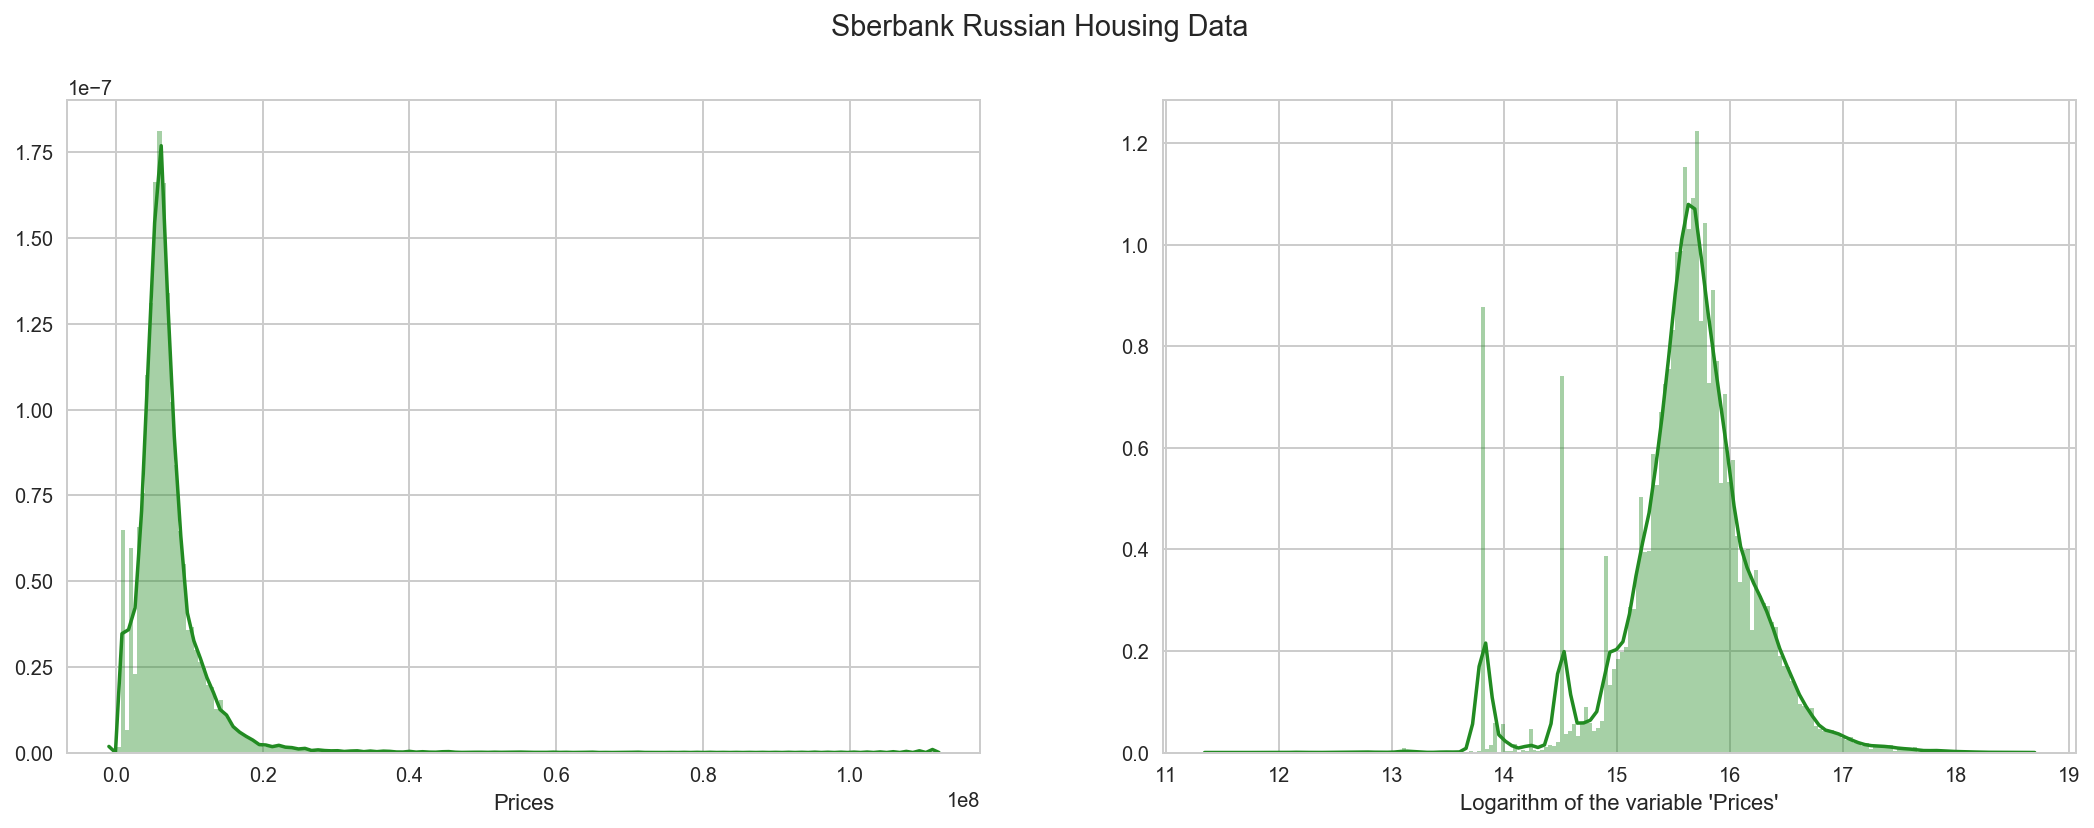

In [9]:
hide_code
plt.style.use('seaborn-whitegrid')
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.distplot(target_train, bins=200, color='#228B22', ax=ax1)
ax1.set_xlabel("Prices")

sns.distplot(np.log(target_train), bins=200, color='#228B22', ax=ax2)
ax2.set_xlabel("Logarithm of the variable 'Prices'")

plt.suptitle('Sberbank Russian Housing Data');

In [10]:
hide_code
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(train[X_list_num+X_list_cat].keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  44
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


### 5.2 Fill in Missing Values

In [11]:
hide_code
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [12]:
hide_code
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [13]:
hide_code
df_train = pd.DataFrame(train, columns=X_list_num)
df_train_cat = pd.DataFrame(train, columns=X_list_num+X_list_cat)

df_test = pd.DataFrame(test, columns=X_list_num)
df_test_cat = pd.DataFrame(test, columns=X_list_num+X_list_cat)

df_train['prices'] = target_train
df_train_cat['prices'] = target_train

df_train = df_train.dropna(subset=['num_room'])
df_train_cat = df_train_cat.dropna(subset=['num_room'])

df_train['metro_min_walk'] = \
df_train['metro_min_walk'].interpolate(method='linear')
df_train_cat['metro_min_walk'] = \
df_train_cat['metro_min_walk'].interpolate(method='linear')

df_train['railroad_station_walk_min'] = \
df_train['railroad_station_walk_min'].interpolate(method='linear')
df_train_cat['railroad_station_walk_min'] = \
df_train_cat['railroad_station_walk_min'].interpolate(method='linear')

df_test['metro_min_walk'] = \
df_test['metro_min_walk'].interpolate(method='linear')
df_test_cat['metro_min_walk'] = \
df_test_cat['metro_min_walk'].interpolate(method='linear')

df_test['railroad_station_walk_min'] = \
df_test['railroad_station_walk_min'].interpolate(method='linear')
df_test_cat['railroad_station_walk_min'] = \
df_test_cat['railroad_station_walk_min'].interpolate(method='linear')

len(df_train)

20899

### 5.3 Macro and Categorical Features

In [14]:
hide_code
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
# salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

df_train['timestamp'].replace(usdrub_pairs,inplace=True)
df_train_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_test['timestamp'].replace(usdrub_pairs,inplace=True)
df_test_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_train.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_train_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

df_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_test_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

In [15]:
hide_code
for df in [df_train_cat, df_test_cat]:
    print ("____________________________________________")
    
    print('sub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))

____________________________________________
sub area
Number of categories: 146
{'Savelovskoe', 'Izmajlovo', 'Kotlovka', 'Dorogomilovo', 'Poselenie Marushkinskoe', 'Strogino', "Zamoskvorech'e", 'Jakimanka', 'Nagornoe', 'Mitino', 'Poselenie Kievskij', 'Vojkovskoe', 'Severnoe Tushino', 'Chertanovo Juzhnoe', "Kon'kovo", 'Matushkino', 'Basmannoe', 'Poselenie Rjazanovskoe', 'Presnenskoe', 'Poselenie Desjonovskoe', 'Begovoe', 'Staroe Krjukovo', 'Bibirevo', 'Danilovskoe', 'Chertanovo Severnoe', 'Jasenevo', 'Poselenie Mosrentgen', 'Hamovniki', 'Orehovo-Borisovo Juzhnoe', 'Vyhino-Zhulebino', 'Filevskij Park', 'Jaroslavskoe', 'Novokosino', 'Hovrino', "Moskvorech'e-Saburovo", 'Beskudnikovskoe', 'Ramenki', "Mar'ino", 'Rjazanskij', 'Teplyj Stan', 'Severnoe Butovo', 'Taganskoe', 'Vostochnoe', 'Vnukovo', 'Zjablikovo', 'Butyrskoe', 'Troparevo-Nikulino', 'Poselenie Vnukovskoe', 'Zjuzino', 'Cheremushki', 'Ajeroport', 'Shhukino', 'Birjulevo Zapadnoe', 'Poselenie Voronovskoe', 'Poselenie Pervomajskoe', 'K

In [16]:
hide_code
for feature in X_list_cat:
    for element in list(set(df_test_cat[feature])):
        if element not in list(set(df_train_cat[feature])): 
            print (feature, element)      

ID_metro 224


In [17]:
hide_code
ID_metro_cat = pd.factorize(df_train_cat['ID_metro'])
df_train_cat['ID_metro'] = ID_metro_cat[0]

ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219

df_test_cat['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [18]:
hide_code
for feature in X_list_cat:
    if feature !='ID_metro':
        feature_cat = pd.factorize(df_train_cat[feature])
        df_train_cat[feature] = feature_cat[0]
        feature_pairs = dict(zip(list(feature_cat[1]), list(set(feature_cat[0]))))
        df_test_cat[feature].replace(feature_pairs,inplace=True)

In [19]:
hide_code
for df in [df_train_cat, df_test_cat]:
    print ("____________________________________________")
    
    print('sub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))

____________________________________________
sub area
Number of categories: 146
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}

ID metro
Number of categories: 219
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [20]:
hide_code
df_train_cat1 = df_train_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_train_cat[[column]])
    transform = encode.transform(df_train_cat[[column]])
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_train_cat[column].value_counts().index])
    transform = transform.set_index(df_train_cat.index.values)
    df_train_cat1 = pd.concat([df_train_cat1, transform], axis=1)
    df_train_cat1 = df_train_cat1.drop(column, 1)

In [21]:
hide_code
df_train_cat1.iloc[:, 623:636][:3].as_matrix()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
hide_code
df_train_cat['preschool_education_centers_raion'][:3]

7672    0
8056    1
8111    2
Name: preschool_education_centers_raion, dtype: int64

In [23]:
hide_code
df_test_cat1 = df_test_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_test_cat[[column]])
    transform = encode.transform(df_test_cat[[column]])
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_test_cat[column].value_counts().index])
    transform = transform.set_index(df_test_cat.index.values)
    df_test_cat1 = pd.concat([df_test_cat1, transform], axis=1)
    df_test_cat1 = df_test_cat1.drop(column, 1)

### 5.4 Display Correlation

In [24]:
hide_code
pearson = df_train.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
shopping_centers_km                 -0.182459
public_healthcare_km                -0.182388
big_road2_km                        -0.178865
bus_terminal_avto_km                -0.176601
ekder_all                            0.169331
area_m                            

### 5.5 Scale, Shuffle and Split the Data

In [25]:
hide_code
target_train = df_train['prices'].as_matrix()

features_train = df_train.drop('prices', 1).as_matrix()
features_test = df_test.as_matrix()

features_train_cat = df_train_cat.drop('prices', 1).as_matrix()
features_test_cat = df_test_cat.as_matrix()

features_train_cat_enc = df_train_cat1.drop('prices', 1).as_matrix()
features_test_cat_enc = df_test_cat1.as_matrix()

In [26]:
hide_code
print('Numeric Features')
X_train, X_test, y_train, y_test = \
train_test_split(features_train, target_train, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

Numeric Features


((16719, 36), (4180, 36))

In [27]:
hide_code
print('Numeric and Categorical Features')
X_train_cat, X_test_cat, y_train_cat, y_test_cat = \
train_test_split(features_train_cat, target_train, test_size = 0.2, random_state = 1)
X_train_cat.shape, X_test_cat.shape

Numeric and Categorical Features


((16719, 44), (4180, 44))

In [28]:
print('Numeric and Encoded Categorical Features')
X_train_cat_enc, X_test_cat_enc, y_train_cat_enc, y_test_cat_enc = \
train_test_split(features_train_cat_enc, target_train, test_size = 0.2, random_state = 1)
X_train_cat_enc.shape, X_test_cat_enc.shape

Numeric and Encoded Categorical Features


((16719, 635), (4180, 635))

In [29]:
hide_code
scale_X = RobustScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_y = RobustScaler()
y_train = scale_y.fit_transform(y_train.reshape(-1,1))
y_test = scale_y.transform(y_test.reshape(-1,1))

scale_X_cat = RobustScaler()
X_train_cat = scale_X_cat.fit_transform(X_train_cat)
X_test_cat = scale_X_cat.transform(X_test_cat)

scale_y_cat = RobustScaler()
y_train_cat = scale_y_cat.fit_transform(y_train_cat.reshape(-1,1))
y_test_cat = scale_y_cat.transform(y_test_cat.reshape(-1,1))

scale_X_cat_enc = RobustScaler()
X_train_cat_enc = scale_X_cat_enc.fit_transform(X_train_cat_enc)
X_test_cat_enc = scale_X_cat_enc.transform(X_test_cat_enc)

scale_y_cat_enc = RobustScaler()
y_train_cat_enc = scale_y_cat_enc.fit_transform(y_train_cat_enc.reshape(-1,1))
y_test_cat_enc = scale_y_cat_enc.transform(y_test_cat_enc.reshape(-1,1))

---
## $\mathfrak {\color{#228B22} {6. \ Benchmark \ Models }}$
### 6.1 Regressors; Scikit-Learn
#### Tuning Parameters

In [178]:
hide_code
print('Numeric Features')
print ('Gradient Boosting Regressor')
param_grid_gbr = {'max_depth': [3, 4, 5], 'n_estimators': range(36, 361, 36)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), 
                              param_grid_gbr, n_jobs=5).fit(X_train, y_train)

gridsearch_gbr.best_params_

Numeric Features
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 324}

In [179]:
hide_code
print ('Bagging Regressor')
param_grid_br = {'n_estimators': range(36, 361, 36)}
gridsearch_br = GridSearchCV(BaggingRegressor(), 
                             param_grid_br, n_jobs=5).fit(X_train, y_train)

gridsearch_br.best_params_

Bagging Regressor


{'n_estimators': 252}

In [182]:
hide_code
print('Numeric and Categorical Features')
print ('Gradient Boosting Regressor')
param_grid_gbr_cat = {'max_depth': [3, 4, 5], 'n_estimators': range(44, 441, 44)}
gridsearch_gbr_cat = GridSearchCV(GradientBoostingRegressor(), 
                                  param_grid_gbr_cat, n_jobs=5).fit(X_train_cat, y_train_cat)

gridsearch_gbr_cat.best_params_

Numeric and Categorical Features
Gradient Boosting Regressor


{'max_depth': 3, 'n_estimators': 396}

In [183]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat = {'n_estimators': range(44, 441, 44)}
gridsearch_br_cat = GridSearchCV(BaggingRegressor(), 
                                 param_grid_br_cat, n_jobs=5).fit(X_train_cat, y_train_cat)

gridsearch_br_cat.best_params_

Bagging Regressor


{'n_estimators': 220}

In [ ]:
hide_code
print('Numeric and Encoded Categorical Features')
print ('Gradient Boosting Regressor')
param_grid_gbr_cat_enc = {'max_depth': [3, 4, 5], 'n_estimators': [159, 318, 635]}
gridsearch_gbr_cat_enc = GridSearchCV(GradientBoostingRegressor(), 
                                      param_grid_gbr_cat_enc, 
                                      n_jobs=5).fit(X_train_cat_enc, y_train_cat_enc)

gridsearch_gbr_cat_enc.best_params_

Numeric and Encoded Categorical Features
Gradient Boosting Regressor


{'max_depth': 3, 'n_estimators': 635}

In [ ]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat_enc = {'n_estimators': [64, 128, 256]}
gridsearch_br_cat_enc = GridSearchCV(BaggingRegressor(), 
                                     param_grid_br_cat_enc, 
                                     n_jobs=5).fit(X_train_cat_enc, y_train_cat_enc)

gridsearch_br_cat_enc.best_params_

#### Fit the Regressors

In [180]:
hide_code
print('Numeric Features')
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=324), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=252), 
                                   X_train, X_test, y_train)

scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

Numeric Features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.855530070581
EV score. Test:  0.718274652547
---------
R2 score. Train:  0.855530070581
R2 score. Test:  0.718178916697
---------
MSE score. Train:  0.262730060681
MSE score. Test:  0.563896900623
---------
MAE score. Train:  0.321120239214
MAE score. Test:  0.401624484021
---------
MdAE score. Train:  0.177081374557
MdAE score. Test:  0.198383451905
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.956190171483
EV score. Test:  0.716994749216
---------
R2 score. Train:  0.956162108624
R2 score. Test:  0.716619767062
---------
MSE score. Train:  0.0797226932116
MSE score. Test:  0.567016609185
---------
MAE score. Train:  0.147009211942
MAE score. Test:  0.39227043591
---------
MdAE score. Train:  0.0637394157848
MdAE score. Test:  0.179632895172


In [185]:
hide_code
print('Numeric and Categorical Features')
y_train_cat_gbr, y_test_cat_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=396), X_train_cat, X_test_cat, y_train_cat)

y_train_cat_br, y_test_cat_br = \
regression(BaggingRegressor(n_estimators=220), X_train_cat, X_test_cat, y_train_cat)

scores('GradientBoostingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_gbr, y_test_cat_gbr)
scores('BaggingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_br, y_test_cat_br)

Numeric and Categorical Features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.819256487057
EV score. Test:  0.717014640542
---------
R2 score. Train:  0.819256487057
R2 score. Test:  0.716934562376
---------
MSE score. Train:  0.328696458248
MSE score. Test:  0.566386734018
---------
MAE score. Train:  0.352419590753
MAE score. Test:  0.407219896233
---------
MdAE score. Train:  0.190394737254
MdAE score. Test:  0.204452251533
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.955477409165
EV score. Test:  0.719726050076
---------
R2 score. Train:  0.955457138674
R2 score. Test:  0.719350272522
---------
MSE score. Train:  0.0810047371538
MSE score. Test:  0.5615531302
---------
MAE score. Train:  0.147605358498
MAE score. Test:  0.391394076846
---------
MdAE score. Train:  0.0635101010101
MdAE score. Test:  0.177544065972


In [ ]:
hide_code
print('Numeric and Encoded Categorical Features')
y_train_cat_enc_gbr, y_test_cat_enc_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=635), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

y_train_cat_enc_br, y_test_cat_enc_br = \
regression(BaggingRegressor(n_estimators=64), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

scores('GradientBoostingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_gbr, y_test_cat_enc_gbr)
scores('BaggingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_br, y_test_cat_enc_br)

#### MLP Regressors

In [188]:
hide_code
mlpr = MLPRegressor(hidden_layer_sizes=(288,), max_iter=200, 
                    solver='lbfgs', alpha=0.01)
mlpr.fit(X_train, y_train)

y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

scores('MLP Regressor; Numeric Features', 
       y_train, y_test, y_train_mlpr, y_test_mlpr)

_______________________________________
MLP Regressor; Numeric Features
_______________________________________
EV score. Train:  0.698989692983
EV score. Test:  0.688702635283
---------
R2 score. Train:  0.698987943088
R2 score. Test:  0.688650144175
---------
MSE score. Train:  0.547414374026
MSE score. Test:  0.622981136298
---------
MAE score. Train:  0.420471447836
MAE score. Test:  0.437429475787
---------
MdAE score. Train:  0.225558423772
MdAE score. Test:  0.236471443344


In [189]:
hide_code
mlpr_cat = MLPRegressor(hidden_layer_sizes=(352,), max_iter=200, 
                        solver='lbfgs', alpha=0.01)
mlpr_cat.fit(X_train_cat, y_train_cat)

y_train_cat_mlpr = mlpr_cat.predict(X_train_cat)
y_test_cat_mlpr = mlpr_cat.predict(X_test_cat)

scores('MLP Regressor; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_mlpr, y_test_cat_mlpr)

_______________________________________
MLP Regressor; Numeric and Categorical Features
_______________________________________
EV score. Train:  0.716251661257
EV score. Test:  0.684624106246
---------
R2 score. Train:  0.716248497822
R2 score. Test:  0.684580475113
---------
MSE score. Train:  0.516024681991
MSE score. Test:  0.631124152938
---------
MAE score. Train:  0.412005709168
MAE score. Test:  0.438139625828
---------
MdAE score. Train:  0.223666964182
MdAE score. Test:  0.234803821733


In [ ]:
hide_code
mlpr_cat_enc = MLPRegressor(hidden_layer_sizes=(635,), max_iter=10, 
                            solver='lbfgs', alpha=0.01)
mlpr_cat_enc.fit(X_train_cat_enc, y_train_cat_enc)

y_train_cat_enc_mlpr = mlpr_cat_enc.predict(X_train_cat_enc)
y_test_cat_enc_mlpr = mlpr_cat_enc.predict(X_test_cat_enc)

scores('MLP Regressor; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlpr, y_test_cat_enc_mlpr)

#### Display Predictions

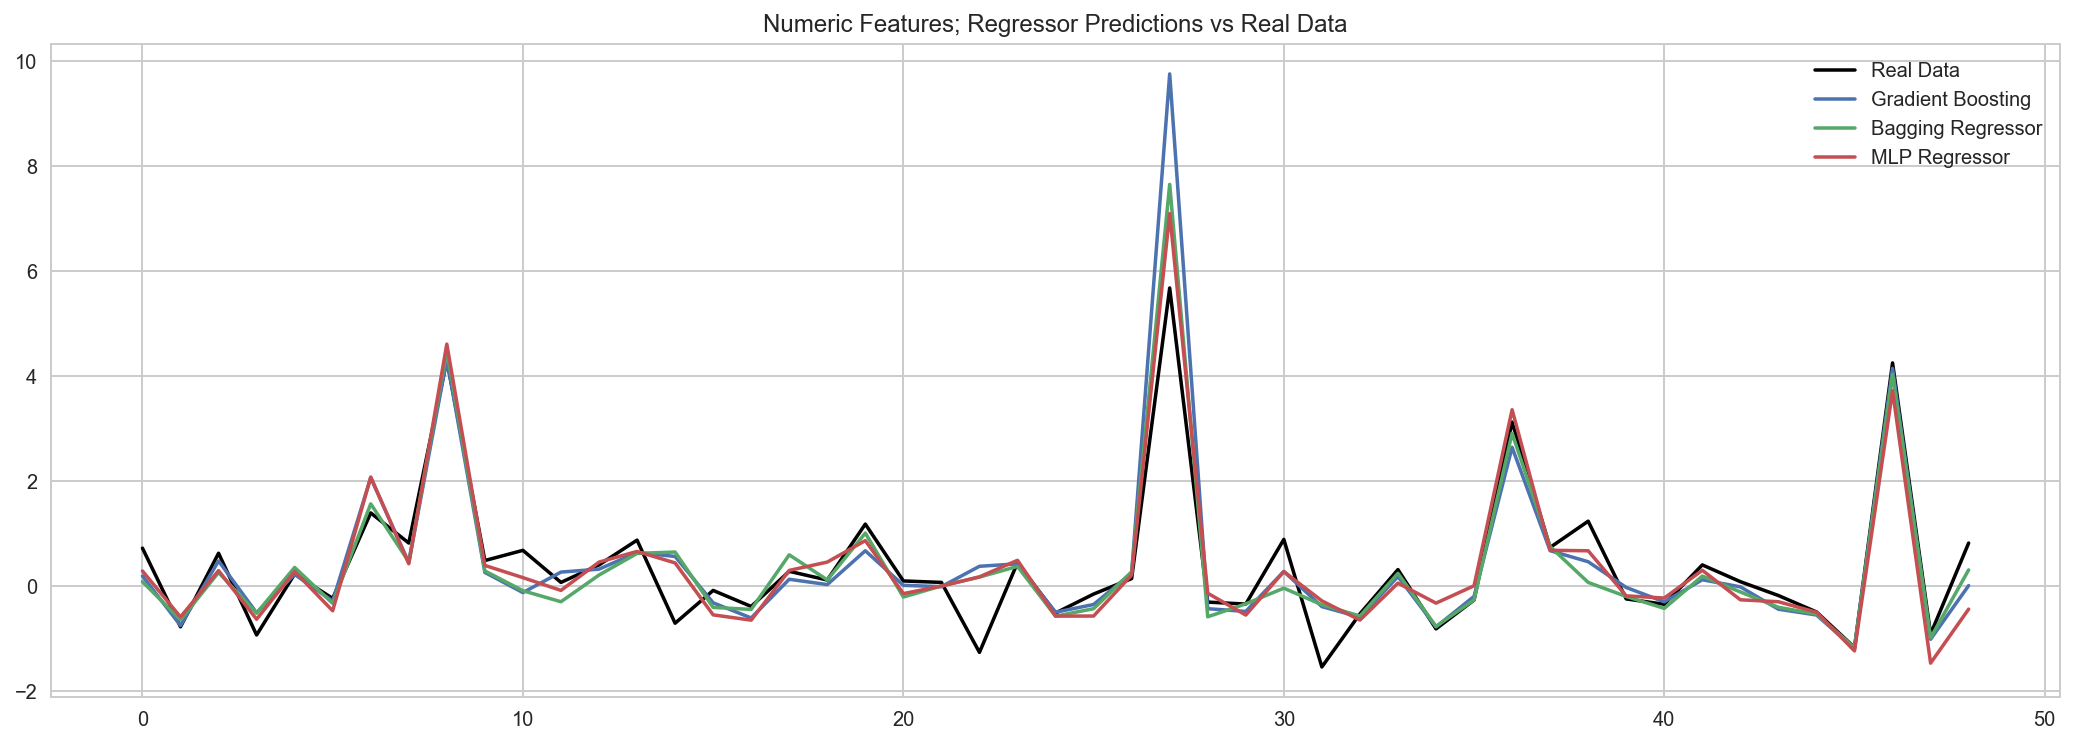

In [190]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric Features; Regressor Predictions vs Real Data");

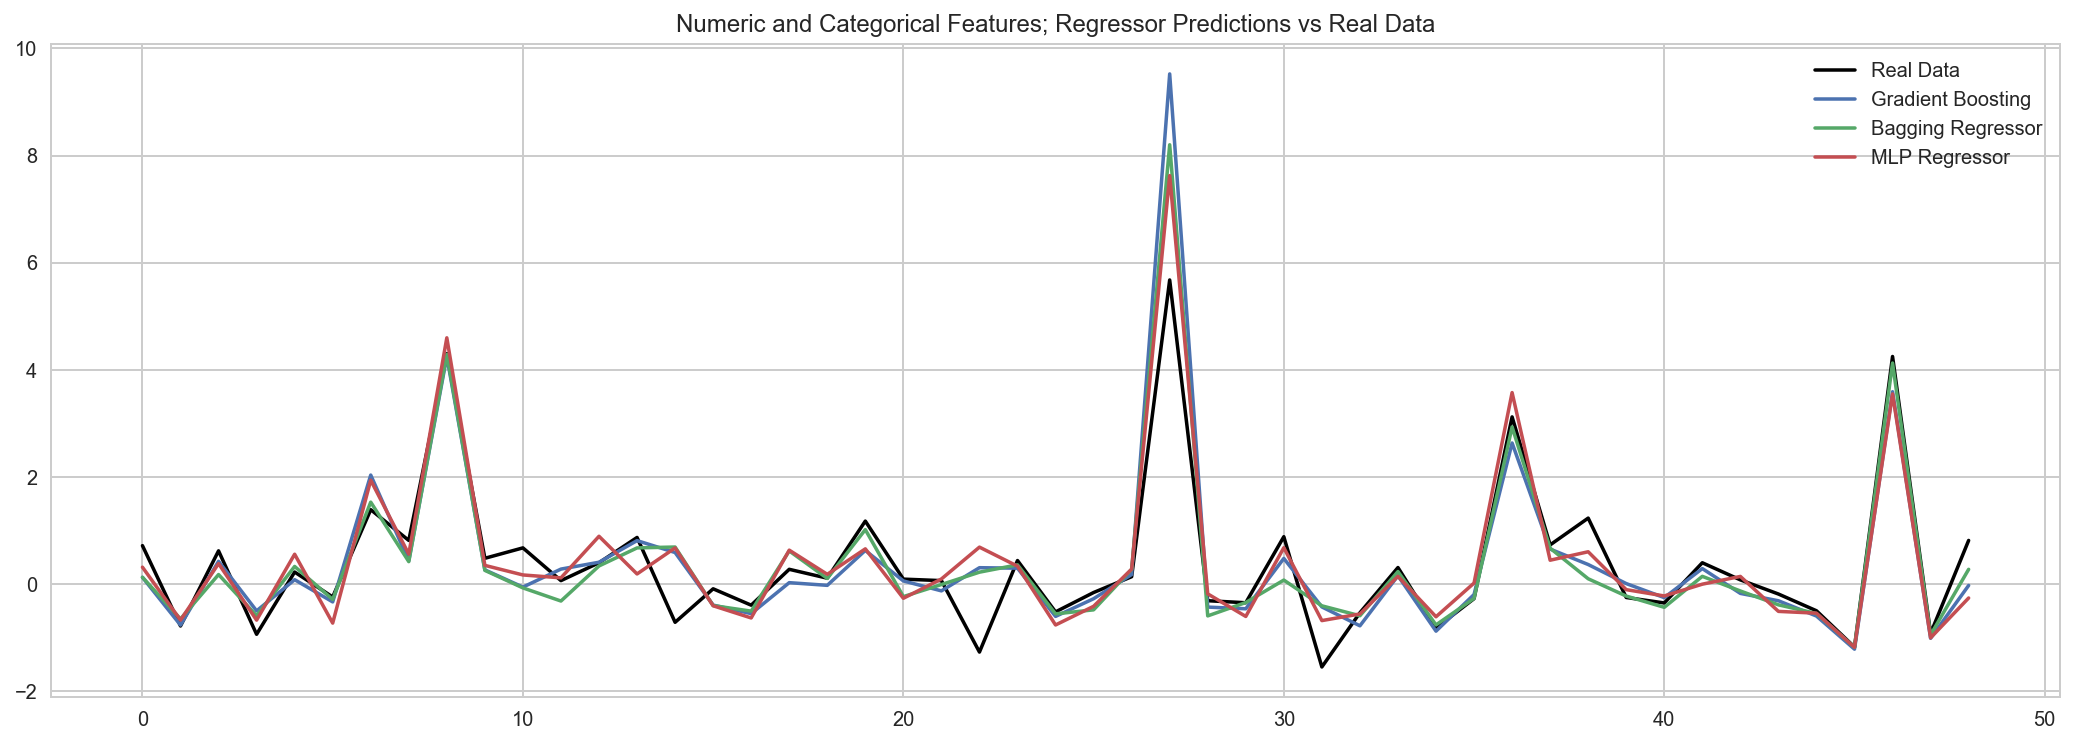

In [191]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Categorical Features; Regressor Predictions vs Real Data");

In [ ]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat_enc[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Regressor Predictions vs Real Data");

### 6.2 Neural Networks; Keras
#### MLP

In [ ]:
hide_code
def mlp_model():
    model = Sequential()
    
    model.add(Dense(36, activation='relu', input_dim=36))
    model.add(Dense(36, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(144, activation='relu'))
    model.add(Dense(144, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(576, activation='relu'))
    model.add(Dense(576, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model = mlp_model()

mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=10, batch_size=128, verbose=2)

In [ ]:
hide_code
loss_plot(mlp_history)
mae_plot(mlp_history)

In [ ]:
hide_code
y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)

scores('MLP Model; Numeric Features', y_train, y_test, y_train_mlp, y_test_mlp)

In [ ]:
hide_code
mlp_model.save('mlp_model_p6_v1.h5')

In [ ]:
hide_code
def mlp_cat_model():
    model = Sequential()
    
    model.add(Dense(44, activation='relu', input_dim=44))
    model.add(Dense(44, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(156, activation='relu'))
    model.add(Dense(156, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(624, activation='relu'))
    model.add(Dense(624, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_model = mlp_cat_model()

mlp_cat_history = mlp_cat_model.fit(X_train_cat, y_train_cat, 
                                    validation_data=(X_test_cat, y_test_cat),
                                    nb_epoch=10, batch_size=128, verbose=2)

In [ ]:
hide_code
loss_plot(mlp_cat_history)
mae_plot(mlp_cat_history)

In [ ]:
hide_code
y_train_cat_mlp = mlp_cat_model.predict(X_train_cat)
y_test_cat_mlp = mlp_cat_model.predict(X_test_cat)

scores('MLP Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_mlp, y_test_cat_mlp)

In [ ]:
hide_code
mlp_cat_model.save('mlp_cat_model_p6_v1.h5')

In [ ]:
hide_code
def mlp_cat_enc_model():
    model = Sequential()
    
    model.add(Dense(79, activation='relu', input_dim=44))
    model.add(Dense(79, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(635, activation='relu'))
    model.add(Dense(635, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_enc_model = mlp_cat_enc_model()

mlp_cat_enc_history = mlp_cat_enc_model.fit(X_train_cat_enc, y_train_cat_enc, 
                                            validation_data=(X_test_cat_enc, y_test_cat_enc),
                                            nb_epoch=10, batch_size=128, verbose=2)

In [ ]:
hide_code
loss_plot(mlp_cat_enc_history)
mae_plot(mlp_cat_enc_history)

In [ ]:
hide_code
y_train_cat_enc_mlp = mlp_cat_enc_model.predict(X_train_cat_enc)
y_test_cat_enc_mlp = mlp_cat_enc_model.predict(X_test_cat_enc)

scores('MLP Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlp, y_test_cat_enc_mlp)

In [ ]:
hide_code
mlp_cat_enc_model.save('mlp_cat_enc_model_p6_v1.h5')

#### CNN

In [ ]:
hide_code
def cnn_model():
    model = Sequential()
        
    model.add(Conv1D(36, 5, padding='valid', activation='relu', input_shape=(36, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(144, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(576, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_model = cnn_model()
cnn_history = cnn_model.fit(X_train.reshape(16719, 36, 1), y_train, 
                            epochs=10, batch_size=128, verbose=2,
                            validation_data=(X_test.reshape(4180, 36, 1), y_test))

In [ ]:
hide_code
loss_plot(cnn_history)
mae_plot(cnn_history)

In [ ]:
hide_code
y_train_cnn = cnn_model.predict(X_train.reshape(16719, 36, 1))
y_test_cnn = cnn_model.predict(X_test.reshape(4180, 36, 1))

scores('CNN Model; Numeric Features', y_train, y_test, y_train_cnn, y_test_cnn)

In [ ]:
hide_code
cnn_model.save('cnn_model_p6_v1.h5')

In [ ]:
hide_code
def cnn_cat_model():
    model = Sequential()
        
    model.add(Conv1D(44, 5, padding='valid', activation='relu', input_shape=(44, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(156, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(624, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_cat_model = cnn_cat_model()
cnn_cat_history = cnn_cat_model.fit(X_train_cat.reshape(16719, 44, 1), y_train_cat, 
                                    epochs=10, batch_size=128, verbose=2,
                                    validation_data=(X_test_cat.reshape(4180, 44, 1), y_test_cat))

In [ ]:
hide_code
loss_plot(cnn_cat_history)
mae_plot(cnn_cat_history)

In [ ]:
hide_code
y_train_cat_cnn = cnn_cat_model.predict(X_train_cat.reshape(16719, 44, 1))
y_test_cat_cnn = cnn_cat_model.predict(X_test_cat.reshape(4180, 44, 1))

scores('CNN Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_cnn, y_test_cat_cnn)

In [ ]:
hide_code
cnn_cat_model.save('cnn_cat_model_p6_v1.h5')

In [ ]:
hide_code
def cnn_cat_enc_model():
    model = Sequential()
        
    model.add(Conv1D(44, 5, padding='valid', activation='relu', input_shape=(44, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(156, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(624, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_cat_enc_model = cnn_cat_enc_model()
cnn_cat_enc_history = \
cnn_cat_enc_model.fit(X_train_cat_enc.reshape(16719, 635, 1), y_train_cat_enc, 
                      epochs=10, batch_size=128, verbose=2,
                      validation_data=(X_test_cat_enc.reshape(4180, 635, 1), y_test_cat_enc))

In [ ]:
hide_code
loss_plot(cnn_cat_enc_history)
mae_plot(cnn_cat_enc_history)

In [ ]:
hide_code
y_train_cat_enc_cnn = cnn_cat_enc_model.predict(X_train_cat_enc.reshape(16719, 635, 1))
y_test_cat_enc_cnn = cnn_cat_enc_model.predict(X_test_cat_enc.reshape(4180, 635, 1))

scores('CNN Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_cnn, y_test_cat_enc_cnn)

In [ ]:
hide_code
cnn_cat_enc_model.save('cnn_cat_enc_model_p6_v1.h5')

#### RNN

In [ ]:
hide_code
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(144, return_sequences=True, input_shape=(1, 36)))
    model.add(LSTM(576, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model = rnn_model()
rnn_history = rnn_model.fit(X_train.reshape(16719, 1, 36), y_train.reshape(16719), 
                            epochs=5, verbose=2, 
                            validation_data=(X_test.reshape(4180, 1, 36), y_test.reshape(4180)))

In [ ]:
hide_code
loss_plot(rnn_history)
mae_plot(rnn_history)

In [ ]:
hide_code
y_train_rnn = rnn_model.predict(X_train.reshape(16719, 1, 36))
y_test_rnn = rnn_model.predict(X_test.reshape(4180, 1, 36))

scores('RNN Model; Numeric Features', y_train, y_test, y_train_rnn, y_test_rnn)

In [ ]:
hide_code
rnn_model.save('rnn_model_p6_v1.h5')

In [ ]:
hide_code
def rnn_cat_model():
    model = Sequential()
    
    model.add(LSTM(156, return_sequences=True, input_shape=(1, 44)))
    model.add(LSTM(624, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_model = rnn_cat_model()
rnn_cat_history = rnn_cat_model.fit(X_train_cat.reshape(16719, 1, 44), y_train_cat.reshape(16719), 
                                    epochs=5, verbose=2, 
                                    validation_data=(X_test_cat.reshape(4180, 1, 44), y_test_cat.reshape(4180)))

In [ ]:
hide_code
loss_plot(rnn_cat_history)
mae_plot(rnn_cat_history)

In [ ]:
hide_code
y_train_cat_rnn = rnn_cat_model.predict(X_train_cat.reshape(16719, 1, 44))
y_test_cat_rnn = rnn_cat_model.predict(X_test_cat.reshape(4180, 1, 44))

scores('RNN Model; Numeric and Categorical Features', 
       y_train_cat, y_test_cat, y_train_cat_rnn, y_test_cat_rnn)

In [ ]:
hide_code
rnn_cat_model.save('rnn_cat_model_p6_v1.h5')

In [ ]:
hide_code
def rnn_cat_enc_model():
    model = Sequential()
    
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 635)))
    model.add(LSTM(635, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_enc_model = rnn_cat_enc_model()
rnn_cat_enc_history = \
rnn_cat_enc_model.fit(X_train_cat_enc.reshape(16719, 1, 635), y_train_cat_enc.reshape(16719), 
                      epochs=5, verbose=2, 
                      validation_data=(X_test_cat_enc.reshape(4180, 1, 635), y_test_cat_enc.reshape(4180)))

In [ ]:
hide_code
loss_plot(rnn_cat_enc_history)
mae_plot(rnn_cat_enc_history)

In [ ]:
hide_code
y_train_cat_enc_rnn = rnn_cat_enc_model.predict(X_train_cat_enc.reshape(16719, 1, 635))
y_test_cat_enc_rnn = rnn_cat_enc_model.predict(X_test_cat_enc.reshape(4180, 1, 635))

scores('RNN Model; Numeric and Encoded Categorical Features', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_rnn, y_test_cat_enc_rnn)

In [ ]:
hide_code
rnn_cat_enc_model.save('rnn_cat_enc_model_p6_v1.h5')

#### Display Predictions

In [ ]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP')
plt.plot(y_test_cnn[1:50], label='CNN')
plt.plot(y_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Neural Network Predictions vs Real Data");

In [ ]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_mlp[1:50], label='MLP')
plt.plot(y_test_cat_cnn[1:50], label='CNN')
plt.plot(y_test_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Neural Network Predictions vs Real Data");

In [ ]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(y_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(y_test_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Neural Network Predictions vs Real Data");

---
## $\mathfrak {\color{#228B22} {7. \  Evaluation \ Metrics }}$
- explained variance regression score
- coefficient of determination
- mean squared error
- mean absolute error
- median absolute error

### 7.1 Regressors; Scikit-Learn

### 7.2 Neural Networks; Keras

### 7.3 Display All Predictions

---
## $\mathfrak {\color{#228B22} {8. \  Project \ Design }}$

The project was built on the basis of the competition offered on the site https://www.kaggle.com. 

The competition version of this notebook is avalible here: https://www.kaggle.com/olgabelitskaya/sberbank-russian-housing-market .

There are several popular resources (numpy, pandas, matplotlib, scikit-learn and keras) for regression models were used.

The most valuable in this project is the study of real data and the attempt to approximate the predictions on them to the threshold of 70-80 percent.